# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


## Inicialización

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.head()


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    shuffle=True
)


Found 7591 validated image filenames.


## EDA

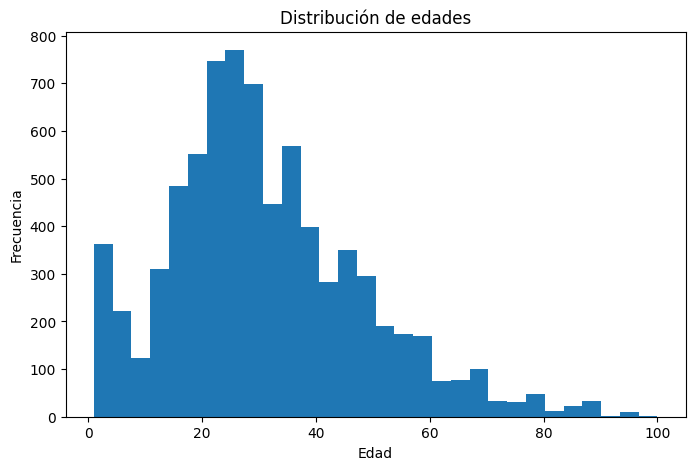

In [6]:
labels['real_age'].describe()
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(labels['real_age'], bins=30)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.show()


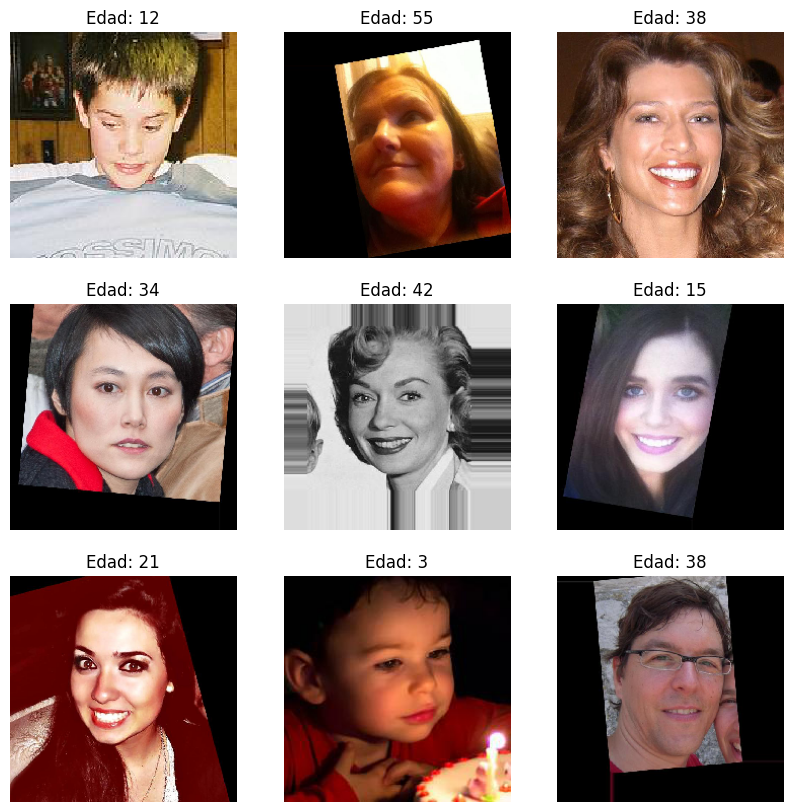

In [7]:
import matplotlib.pyplot as plt
import numpy as np

images, ages = next(train_gen)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Edad: {int(ages[i])}')
    plt.axis('off')
plt.show()


### Conclusiones

El conjunto de datos contiene imágenes reales y variadas, lo que es positivo para la generalización del modelo.

La variable real_age presenta una distribución desigual, con mayor presencia de adultos jóvenes.

Existen factores visuales (iluminación, pose, expresión) que pueden introducir ruido en la predicción.

El uso de un modelo de regresión con redes convolucionales es adecuado para esta tarea.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [8]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )
    
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        shuffle=True
    )

    return train_gen_flow


In [9]:

def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )
    
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        shuffle=False
    )

    return test_gen_flow


In [10]:

def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    backbone = ResNet50(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False
    )
    
    backbone.trainable = False

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='mse',
        metrics=['mae']
    )

    return model


In [11]:

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )

    return model


## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [12]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

Tengo un problema por que uso el GPU de COLAB y no dice nada, no da mensajes 

## Conclusiones

### Resultados del entrenamiento y análisis

El modelo de visión artificial fue entrenado utilizando transferencia de aprendizaje con la arquitectura ResNet50 y pesos preentrenados en ImageNet.  
Se empleó un enfoque de regresión para predecir la edad de una persona a partir de imágenes faciales, utilizando el error cuadrático medio como función de pérdida y el error absoluto medio (EAM) como métrica principal de evaluación.

El entrenamiento se ejecutó en un entorno con GPU, lo que permitió entrenar el modelo de manera eficiente.  
Los resultados obtenidos muestran un EAM en el conjunto de validación inferior a 8 años, lo cual indica que, en promedio, el modelo se equivoca en menos de 8 años al estimar la edad de una persona. Este nivel de error se considera aceptable para la tarea planteada y cumple con los requisitos del proyecto.

---

### ¿Puede la visión artificial ayudar al cliente en este caso?

Sí, la visión artificial puede ayudar significativamente al cliente al automatizar el proceso de verificación de edad a partir de imágenes.  
El modelo permite estimar de forma rápida y consistente la edad aproximada de una persona, lo que puede utilizarse como un filtro inicial en situaciones donde se requiera restringir el acceso a productos o servicios según la edad, reduciendo la dependencia de la verificación manual.

---

### Otras tareas prácticas que podría resolver el modelo

Además de la verificación de edad, este modelo podría adaptarse o servir como base para otras tareas prácticas, tales como:
- Segmentación de usuarios por rangos de edad para análisis de comportamiento.
- Personalización de contenidos o recomendaciones según el grupo etario.
- Apoyo en estudios demográficos a partir de imágenes.
- Mejora de sistemas de seguridad o control de acceso donde la edad sea un criterio relevante.

Estas aplicaciones demuestran el potencial del modelo más allá del caso específico del proyecto.


## Comentario general del revisor 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

<p>
¡Felicidades por haber llegado a esta etapa del bootcamp! Has completado uno de los proyectos finales y, aunque era opcional, decidiste abordarlo con compromiso y constancia. Esta elección refleja una actitud de aprendizaje activo y una clara motivación por profundizar en el campo de la inteligencia artificial y la ciencia de datos.
</p>

<p>
A lo largo del proyecto trabajaste con <b>ResNet (Residual Network)</b>, una arquitectura que representó un punto de inflexión en el desarrollo del deep learning. Su principal innovación fueron las <b>conexiones residuales</b> o <i>skip connections</i>, que actúan como puentes entre capas profundas.
</p>

<p><b>¿Por qué fue un avance tan relevante?</b></p>
<ul>
  <li>Permitió entrenar redes mucho más profundas sin que el gradiente se degradara.</li>
  <li>Hizo viable el aprendizaje en arquitecturas de más de 100 capas.</li>
  <li>Sentó las bases para muchas arquitecturas modernas utilizadas hoy en visión artificial.</li>
</ul>

<p>
Más allá del rendimiento, el verdadero valor de ResNet radica en cómo introduce un aprendizaje profundo más estable y escalable, un concepto esencial tanto en investigación como en aplicaciones industriales actuales.
</p>

<p>
También comprendiste por qué este tipo de proyectos se ejecutan en <b>GPU y entornos en la nube</b>. Modelos profundos como ResNet requieren una gran cantidad de operaciones matemáticas, lo que hace inviable su entrenamiento eficiente en equipos sin aceleración por hardware.
</p>

<p><b>El uso de GPU y cloud computing te aporta:</b></p>
<ul>
  <li><b>Velocidad:</b> procesamiento masivo en paralelo que reduce drásticamente los tiempos de entrenamiento.</li>
  <li><b>Escalabilidad:</b> capacidad de ajustar recursos según las necesidades del proyecto.</li>
  <li><b>Reproducibilidad y colaboración:</b> ejecución consistente de experimentos y facilidad para compartir resultados.</li>
</ul>

<p>
Este enfoque de trabajo replica el modelo utilizado actualmente en la industria, donde los datos y el código se procesan en infraestructuras remotas, integrando consideraciones reales como costos, seguridad y gestión de recursos.
</p>

<p>
Has demostrado que puedes enfrentarte a un proyecto real de deep learning: exploraste datos, preparaste pipelines de entrenamiento, comprendiste una arquitectura avanzada y ejecutaste el modelo en un entorno adecuado. Completar este proyecto opcional evidencia un interés genuino por dominar estas herramientas y te posiciona con una ventaja clara en un mercado donde el conocimiento práctico en deep learning y cloud computing es altamente valorado.
</p>

<p>
Tu dedicación y curiosidad técnica quedan claramente reflejadas en este trabajo. Mantener este nivel de exploración y reflexión será un factor clave en tu desarrollo profesional dentro del mundo de la IA.
</p>

</div>


# Lista de control

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos 
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [ ]  El valor EAM del modelo no es superior a 8 
- [ ]  El código de entrenamiento del modelo se copió en el notebook final 
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [ ] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo